In [95]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import io
import math

## Question 2: Partioning

In [96]:
complete_dataset = {}

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    
    complete_dataset[data_name] = {}
    
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
        complete_dataset[data_name][field] = data[field]


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [97]:
def partitionDataSet(training_data, training_labels, length):
    totalSet = np.concatenate((training_data, \
                               training_labels), axis=1)
    np.random.shuffle(totalSet)    
    
    return totalSet[0:length, :], totalSet[length:, :]

from sklearn.preprocessing import StandardScaler

In [102]:
#Partioning MNIST dataset
print("MNIST Dataset: ")

  ## Standardization
scaler = StandardScaler()
mnist_training_std = scaler.fit_transform(complete_dataset["mnist"]["training_data"])

mnist_validation, mnist_training = partitionDataSet(mnist_training_std, \
                               complete_dataset["mnist"]["training_labels"], 10000)

mnist_validation_x = mnist_validation[:, :-1]
mnist_validation_y = mnist_validation[:, -1:]
print(f"Validation X: {mnist_validation_x.shape} \nValidation Y: {mnist_validation_y.shape}")

mnist_training_x = mnist_training[:, :-1]
mnist_training_y = mnist_training[:, -1:]
print(f"Training X: {mnist_training_x.shape} \nTraining Y: {mnist_training_y.shape}")

MNIST Dataset: 
Validation X: (10000, 784) 
Validation Y: (10000, 1)
Training X: (50000, 784) 
Training Y: (50000, 1)


In [99]:
#Partioning spam dataset
print("Spam dataset")
partition_length = math.ceil(complete_dataset["spam"]["training_data"].shape[0]*0.2)

spam_validation, spam_training = partitionDataSet(complete_dataset["spam"]["training_data"], \
                               complete_dataset["spam"]["training_labels"], partition_length)

spam_validation_x = spam_validation[:, :-1]
spam_validation_y = spam_validation[:, -1:]
print(f"Validation X: {spam_validation_x.shape} \nValidation Y: {spam_validation_y.shape}")

spam_training_x = spam_training[:, :-1]
spam_training_y = spam_training[:, -1:]
print(f"Training X: {spam_training_x.shape} \nTraining Y: {spam_training_y.shape}")

Spam dataset
Validation X: (1035, 32) 
Validation Y: (1035, 1)
Training X: (4137, 32) 
Training Y: (4137, 1)


In [100]:
#Partioning CIFAR-10 dataset
print("CIFAR-10 dataset")
cifar_validation, cifar_training = partitionDataSet(complete_dataset["cifar10"]["training_data"], \
                               complete_dataset["cifar10"]["training_labels"], 5000)

cifar_validation_x = cifar_validation[:, :-1]
cifar_validation_y = cifar_validation[:, -1:]
print(f"Validation X: {cifar_validation_x.shape} \nValidation Y: {cifar_validation_y.shape}")

cifar_training_x = cifar_training[:, :-1]
cifar_training_y = cifar_training[:, -1:]
print(f"Training X: {cifar_training_x.shape} \nTraining Y: {cifar_training_y.shape}")

CIFAR-10 dataset
Validation X: (5000, 3072) 
Validation Y: (5000, 1)
Training X: (45000, 3072) 
Training Y: (45000, 1)


## Question 3, 4 for MNIST Handrwritten Digit Classification

Creating SVC Model and training

In [117]:
#Training on MNIST Dataset

mnist_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracies = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuracies["train"].append(training_acc)
    accuracies["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")


Training with 100 examples
Training accuracy: 0.6814 
Validation Accuracy: 0.6808

Training with 200 examples
Training accuracy: 0.78158 
Validation Accuracy: 0.7801

Training with 500 examples
Training accuracy: 0.85012 
Validation Accuracy: 0.8578

Training with 1000 examples
Training accuracy: 0.87934 
Validation Accuracy: 0.8831

Training with 2000 examples
Training accuracy: 0.90296 
Validation Accuracy: 0.9009

Training with 5000 examples
Training accuracy: 0.91708 
Validation Accuracy: 0.9092

Training with 10000 examples
Training accuracy: 0.92686 
Validation Accuracy: 0.917



**Plotting Training/Validation Accuracy vs. Num Examples Trained with**

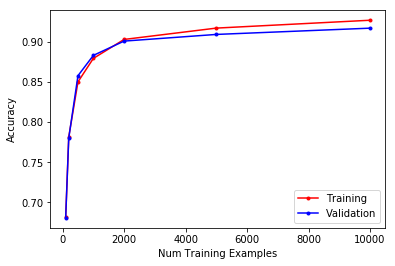

In [121]:
plt.plot(training_ints, accuracies["train"], '.r-')
plt.plot(training_ints, accuracies["val"], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [109]:
# from save_csv import *
# results_to_csv(mnist_clf.predict(complete_dataset["mnist"]["test_data"]))

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

**Tuning regularization hyperparameter and choosing best one:**

In [ ]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
num_training = 5000
accuraciesC = {"train": [], "val": []}
for c in Cs:
    print(f"Training with regularlization param {c}")
    mnist_clf = svm.SVC(kernel='linear', C=c)
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuraciesC["train"].append(training_acc)
    accuraciesC["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with regularlization param 1e-05
Training accuracy: 0.39758 
Validation Accuracy: 0.3952

Training with regularlization param 0.0001
Training accuracy: 0.87646 
Validation Accuracy: 0.8818

Training with regularlization param 0.001
Training accuracy: 0.91732 
Validation Accuracy: 0.9178

Training with regularlization param 0.01


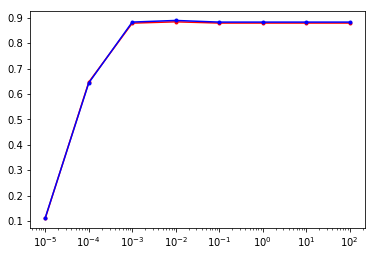

In [113]:
plt.plot(Cs, accuraciesC["train"], '.r-')
plt.plot(Cs, accuraciesC["val"], '.b-')

ax = plt.gca()
ax.set_xscale('log')

plt.show()

maxCtrain = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]
maxCval = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]

print(f"Best C for training: {maxCtrain}, Best C for validation: {maxCVal})

**Using best C and training on all examples (50,000):**

In [ ]:
num_training = 50000
mnist_clf = svm.SVC(kernel='linear', C=0.01)
    
training_y = np.asarray(mnist_training_y).reshape(-1)
validation_y = np.asarray(mnist_validation_y).reshape(-1)

mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))

# accuracies["train"].append(training_acc)
# accuracies["val"].append(val_acc)

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

**Running best MNIST linear SVM model on test set and saving predictions:**

In [116]:
from save_csv import *
results_to_csv(mnist_clf.predict(scaler.fit_transform(complete_dataset["mnist"]["test_data"])))

## Question 3,5 for Spam/Ham Classification